<a href="https://colab.research.google.com/github/Ragnarok540/music/blob/main/src/modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

# Modulator Wave

In [92]:
def w(frequency: float) -> float:
    return 2 * np.pi * frequency

def sine_tone(frequency: int = 440,
              duration: float = 1.0,
              amplitude: float = 0.5,
              sample_rate: int = 44100) -> np.ndarray:
    n_s = int(duration * sample_rate)
    time_points = np.linspace(0, duration, n_s, False)
    sine = np.sin(w(frequency) * time_points)
    sine *= amplitude
    return sine

def plot_signal(signal, start=0, end=5000):
    plt.figure(figsize=(15, 2))
    plt.grid(True)
    plt.plot(signal[start:end])
    plt.show()

my_modulator = sine_tone(frequency=220, duration=3.0, amplitude=0.6)
Audio(my_modulator, rate=44100)

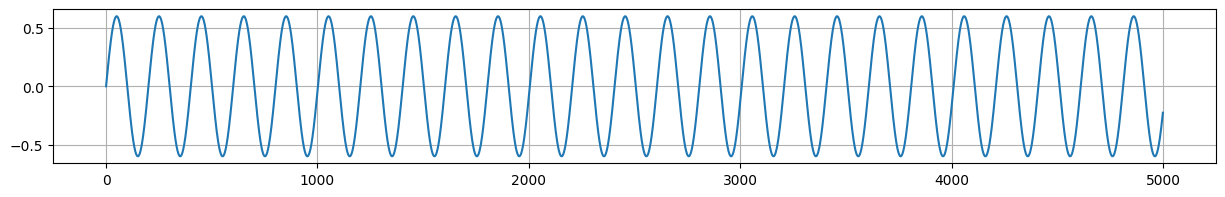

In [93]:
plot_signal(my_modulator)

# Amplitude Modulation

In [94]:
def normalize_amplitude(wave: np.ndarray,
                        amplitude: float = 0.5) -> np.ndarray:
    max_amplitude = np.max(np.abs(wave))
    return amplitude * (wave / max_amplitude)


def time_points(modulator_wave: np.ndarray,
                sample_rate: int = 44100):
    total_samples = len(modulator_wave)
    return np.arange(total_samples) / sample_rate


def amplitude_modulation(carrier_frequency: float,
                         modulator_wave: np.ndarray,
                         modulation_index: float = 0.5,
                         amplitude: float = 0.5,
                         sample_rate: int = 44100) -> np.ndarray:
    t_p = time_points(modulator_wave, sample_rate)
    carrier_wave = np.sin(w(carrier_frequency) * t_p)
    am_wave = (1 + modulation_index * modulator_wave) * carrier_wave
    return normalize_amplitude(am_wave, amplitude)

my_sound_am = amplitude_modulation(22, my_modulator, 20)
Audio(my_sound_am, rate=44100)

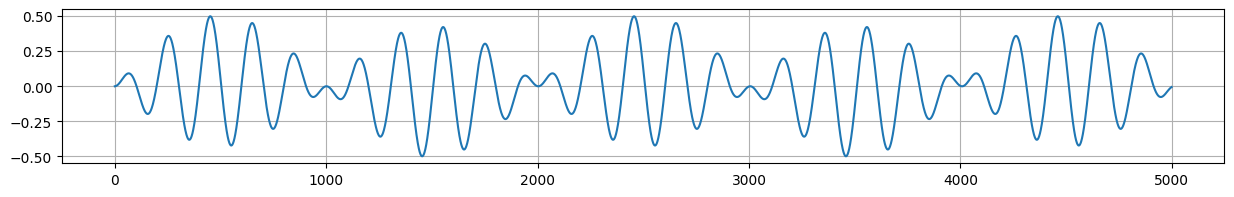

In [95]:
plot_signal(my_sound_am)

# Frequency Modulation

In [124]:
def frequency_modulation(carrier_frequency: float,
                         modulator_wave: np.ndarray,
                         modulation_index: float = 0.5,
                         amplitude: float = 0.5,
                         sample_rate: int = 44100) -> np.ndarray:
    t_p = time_points(modulator_wave, sample_rate)
    fm_wave = np.sin(w(carrier_frequency) * t_p +
                     modulation_index * modulator_wave)
    return normalize_amplitude(fm_wave, amplitude)

my_sound_fm = frequency_modulation(110, my_modulator, 3)
Audio(my_sound_fm, rate=44100)

# AM/FM

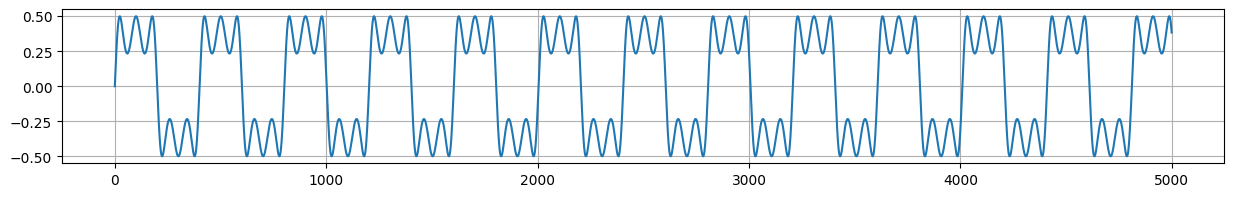

In [125]:
plot_signal(my_sound_fm)

In [98]:
my_sound_am_fm = frequency_modulation(110, my_sound_am, 3)
Audio(my_sound_am_fm, rate=44100)

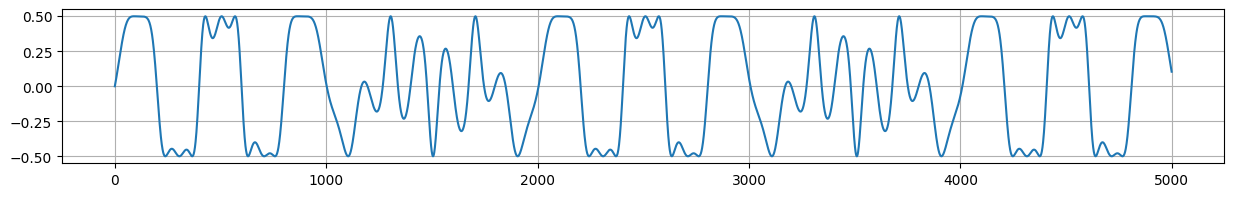

In [99]:
plot_signal(my_sound_am_fm)

In [100]:
my_sound_fm_am = amplitude_modulation(22, my_sound_fm, 20)
Audio(my_sound_fm_am, rate=44100)

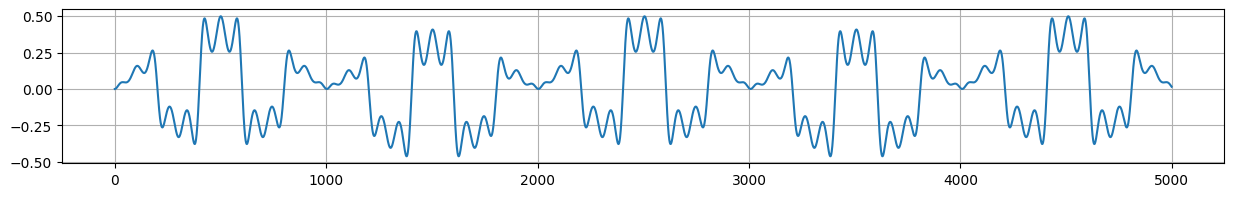

In [101]:
plot_signal(my_sound_fm_am)